#  A1.Use librosa.effects.trim()to remove the silence parts of speech from beginning and end of your recorded signal.Listen to the new signal and perceptually compare the audio with original.

Original Audio:


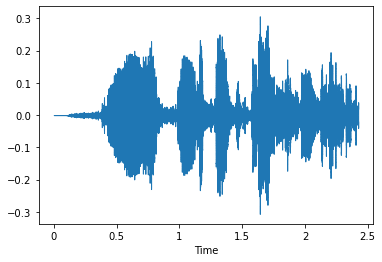

In [1]:
import librosa
import soundfile as sf


audio_file = 'audio.wav'
y, sr = librosa.load(audio_file)


y_trimmed, index = librosa.effects.trim(y)


trimmed_file = 'trimmed_audio.wav'
sf.write(trimmed_file, y_trimmed, sr)

import IPython.display as ipd

print("Original Audio:")
ipd.display(ipd.Audio(audio_file))
librosa.display.waveshow(y)



Trimmed Audio:


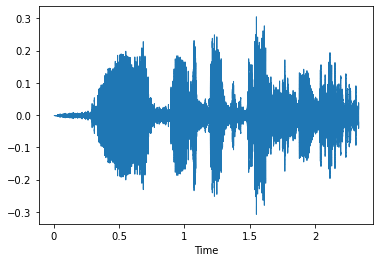

In [2]:
print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_file))
librosa.display.waveshow(y_trimmed)

# A2. Use librosa.effects.split()to splitthe recorded speech with detected silences.Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

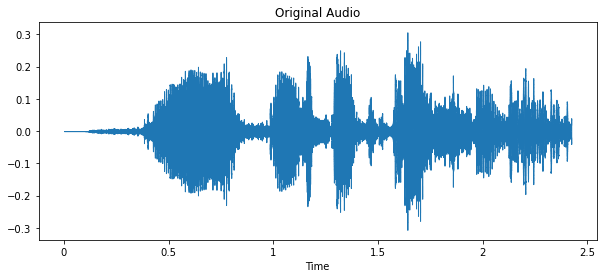

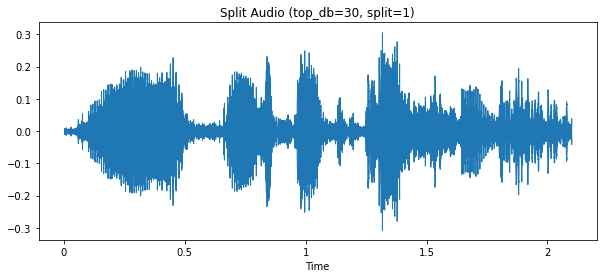

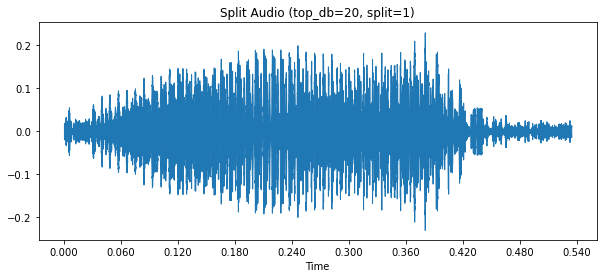

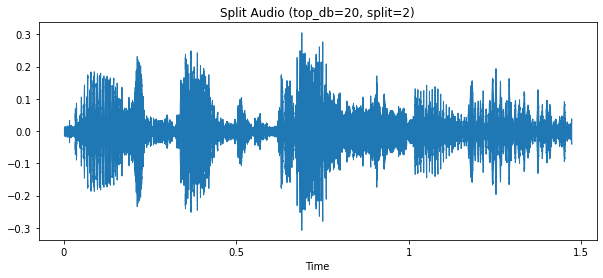

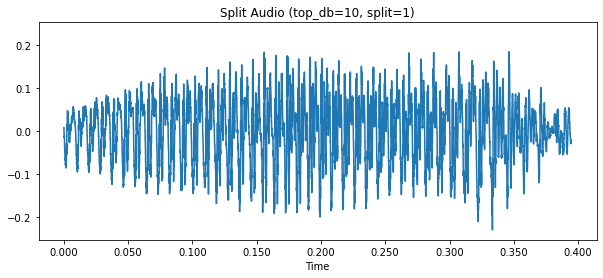

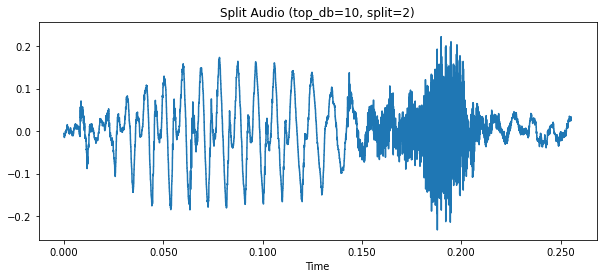

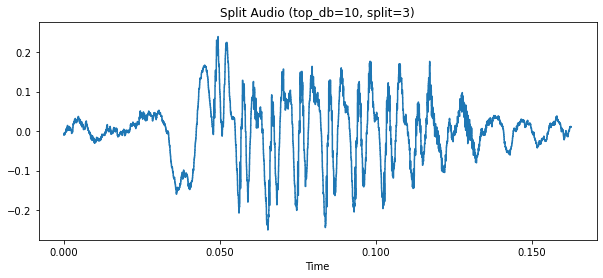

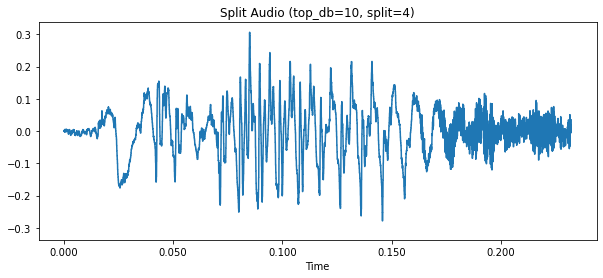

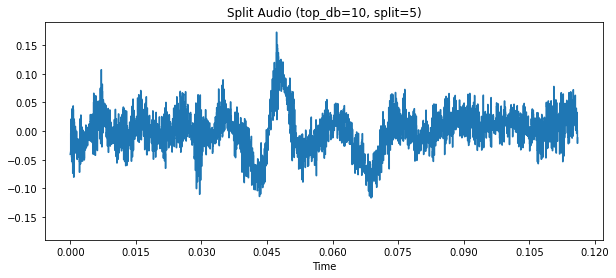

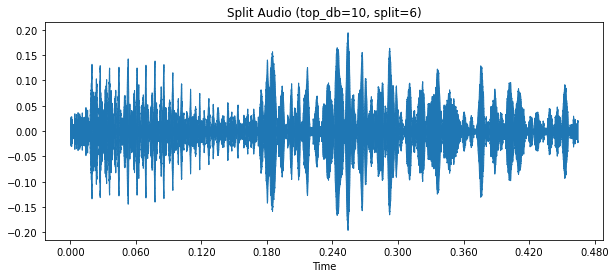

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load the original audio file
original_audio_path = "audio.wav"
y, sr = librosa.load(original_audio_path)

# Plot and listen to the original audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio')
plt.show()

ipd.Audio(y, rate=sr)  # Listen to the original audio
top_db_values = [30, 20, 10]  # You can adjust these values

for top_db in top_db_values:
    splits = librosa.effects.split(y, top_db=top_db)

    # Plot and listen to each split
    for i, split in enumerate(splits):
        split_audio = y[split[0]:split[1]]

        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(split_audio, sr=sr)
        plt.title(f'Split Audio (top_db={top_db}, split={i+1})')
        plt.show()

        ipd.display(ipd.Audio(split_audio, rate=sr))  # Display the split audio



# A3. Use the IEEE paper reference available above for silence detection. Compare the results with the silence detection output from librosa package.

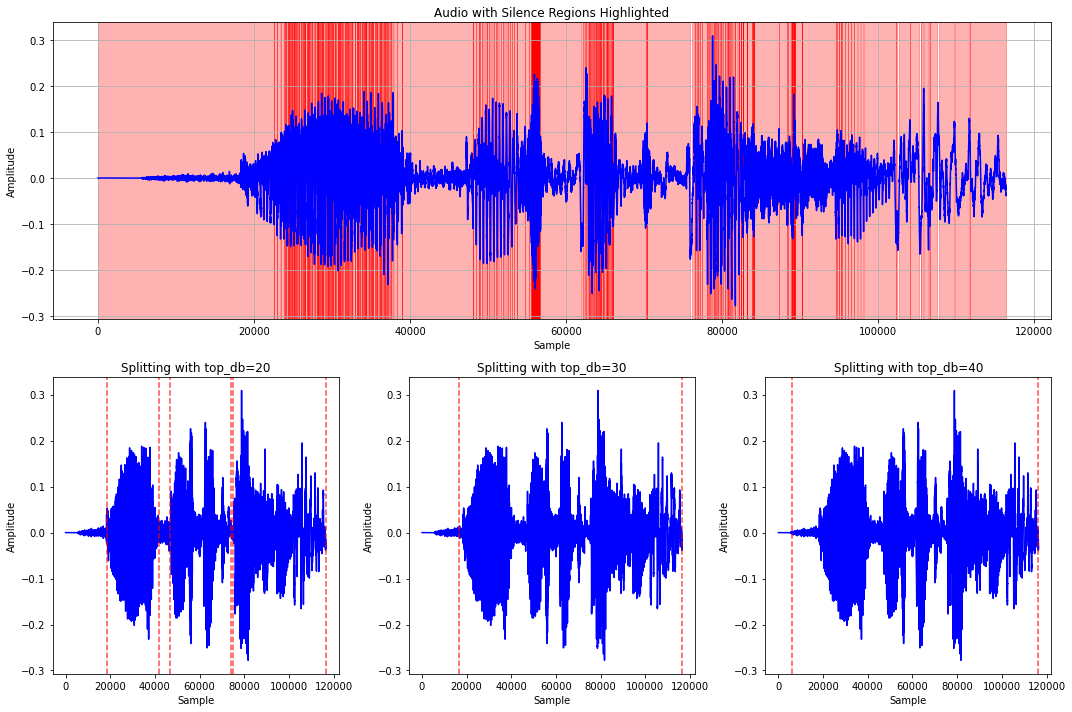

In [4]:
import numpy as np

# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "audio.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Perform splitting with different top_db values
top_db_values = [20, 30, 40] 

# Plot the waveform with silence regions highlighted and split intervals overlaid
plt.figure(figsize=(15, 10))

# Plot the waveform with silence regions highlighted
plt.subplot(2, 1, 1)
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the waveform with split intervals overlaid
for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='r', linestyle='--', alpha=0.7)
        plt.axvline(interval[1], color='r', linestyle='--', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.show()